In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import os


In [5]:


import os
import tensorflow as tf


!wget -q https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip


!unzip -q cats_and_dogs.zip


PATH = 'cats_and_dogs'


train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')


total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

print(f"✅ Dataset successfully loaded!")
print(f"Training images: {total_train}")
print(f"Validation images: {total_val}")
print(f"Test images: {total_test}")
print(f"Image size: {IMG_HEIGHT}x{IMG_WIDTH}, Batch size: {batch_size}, Epochs: {epochs}")


✅ Dataset successfully loaded!
Training images: 2001
Validation images: 1001
Test images: 51
Image size: 150x150, Batch size: 128, Epochs: 15


In [6]:
# 3
BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_dir = os.path.join('cats_and_dogs/train')
validation_dir = os.path.join('cats_and_dogs/validation')
test_dir = os.path.join('cats_and_dogs/test')


test_dummy_dir = os.path.join(test_dir, 'test_images')
os.makedirs(test_dummy_dir, exist_ok=True)


for filename in os.listdir(test_dir):
    if os.path.isfile(os.path.join(test_dir, filename)):
        os.rename(os.path.join(test_dir, filename), os.path.join(test_dummy_dir, filename))



train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    classes=['test_images'],
    class_mode=None,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    shuffle=False
)


val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)



Found 50 images belonging to 1 classes.
Found 1000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


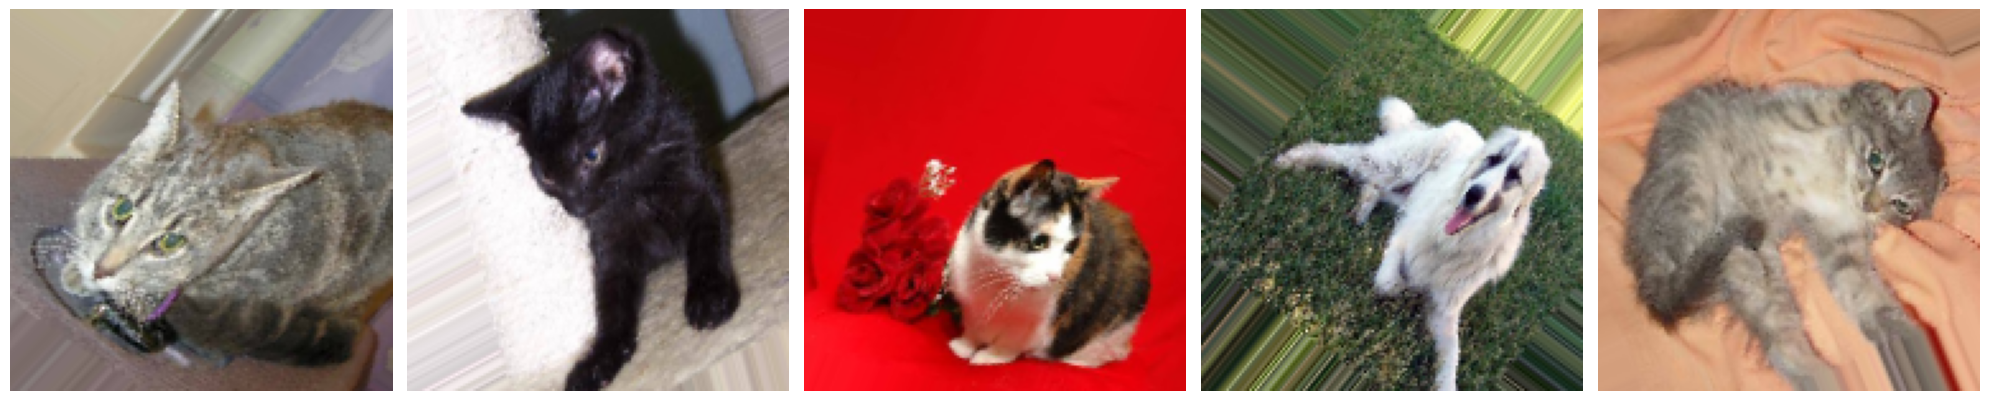

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plotImages(images_arr, probabilities=None):
    """Displays 5 images in a row, optionally with predicted probabilities."""
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()

    for i, (img, ax) in enumerate(zip(images_arr, axes)):
        ax.imshow(img)
        ax.axis('off')

        if probabilities is not None:

            prob = probabilities[i].item() if isinstance(probabilities[i], np.ndarray) else probabilities[i]
            title = f"{prob*100:.2f}% dog" if prob > 0.5 else f"{(1-prob)*100:.2f}% cat"
            ax.set_title(title)
    plt.tight_layout()
    plt.show()

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)


sample_training_images, _ = next(train_data_gen)


plotImages(sample_training_images[:5])

In [8]:

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [9]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [10]:
# 7
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
EPOCHS = 15

history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.samples / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.samples / float(BATCH_SIZE)))
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 305ms/step - accuracy: 0.4815 - loss: 0.9351 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.5128 - loss: 0.6914 - val_accuracy: 0.5890 - val_loss: 0.6839
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.5369 - loss: 0.6911 - val_accuracy: 0.5740 - val_loss: 0.6897
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.5666 - loss: 0.6829 - val_accuracy: 0.6170 - val_loss: 0.6681
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.5624 - loss: 0.6730 - val_accuracy: 0.5430 - val_loss: 0.6866
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.5843 - loss: 0.6824 - val_accuracy: 0.6470 - val_loss: 0.6305
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.6155 - loss: 0.6566 - val_accuracy: 0.6560 - val_loss: 0.6126
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.6450 - loss: 0.6344 - val_accu

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step


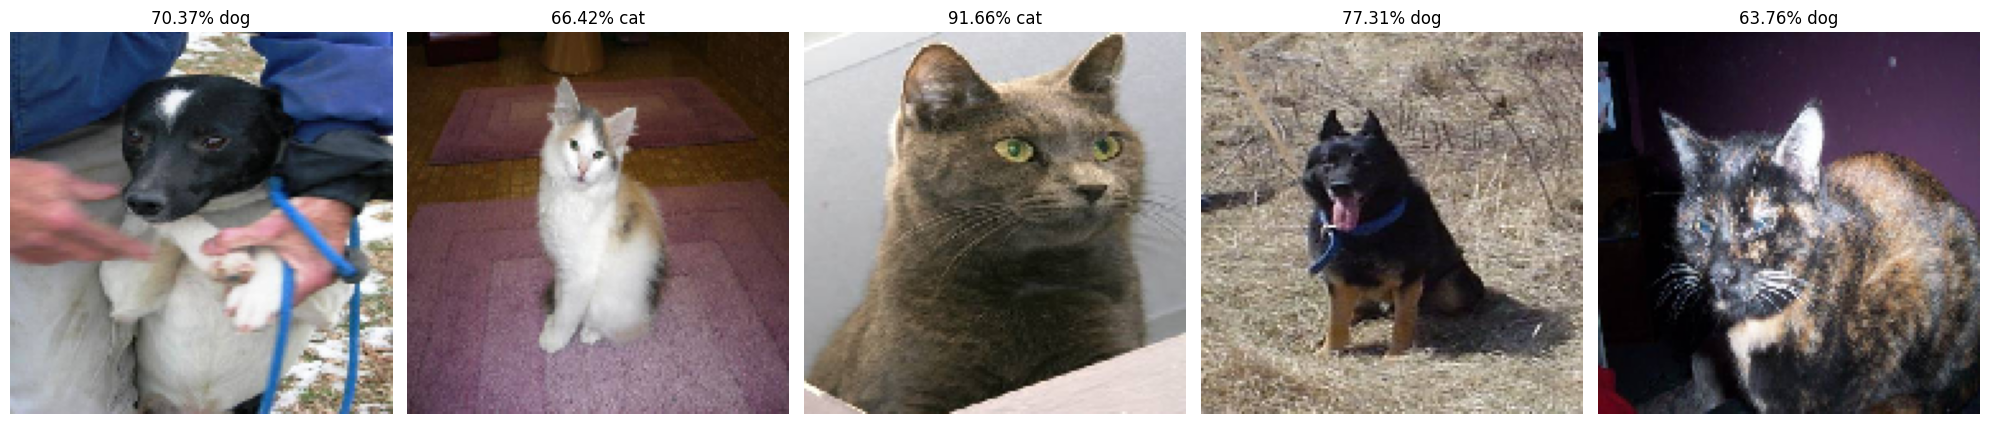

In [ ]:

test_images = next(test_data_gen)


predictions = model.predict(test_images)


predicted_classes = [1 if prob > 0.5 else 0 for prob in predictions]

plotImages(test_images[:5], predictions[:5])